In [2]:
import pandas as pd

import datetime

import numpy as np

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
%matplotlib inline

In [4]:
df=pd.read_excel(r'C:\Users\Marija\Documents\Zavrsni ra\Podaci\Portfolio-2021.xlsx')
df

,ADPL,ADRS2,ARNT,ATGR,ATPL,ERNT,HT,KOEI,PODR,RIVP
0,165.5,415.0,300.0,1680.0,372.0,1840.0,185.5,900.0,632.0,33.0
1,165.0,418.0,300.0,1680.0,370.0,1870.0,185.0,880.0,634.0,33.0
2,165.0,417.0,302.0,1670.0,363.0,1840.0,184.5,870.0,632.0,32.3
3,162.0,415.0,302.0,1670.0,363.0,1825.0,184.0,870.0,628.0,32.5
4,163.5,415.0,304.0,1660.0,361.0,1815.0,183.5,875.0,628.0,31.9
...,...,...,...,...,...,...,...,...,...,...
245,NaN,392.0,NaN,NaN,170.5,1520.0,184.0,NaN,483.0,30.9
246,NaN,NaN,NaN,NaN,157.5,1520.0,182.0,NaN,NaN,31.4
247,NaN,NaN,NaN,NaN,151.5,NaN,182.0,NaN,NaN,31.0
248,NaN,NaN,NaN,NaN,150.0,NaN,180.0,NaN,NaN,30.2


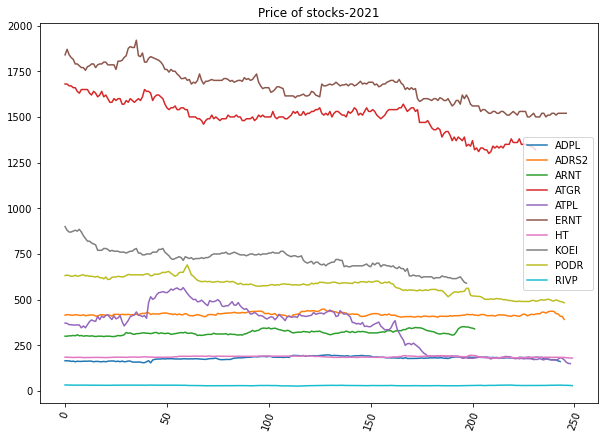

In [18]:
for i, col in enumerate(df.columns):
    df[col].plot(figsize=(10,7))

plt.title('Price of stocks-2021')

plt.xticks(rotation=70)
plt.legend(df.columns)

#Saving the graph into a JPG file
plt.savefig('stockprices21.png', bbox_inches='tight')

In [7]:
returns=df.pct_change()
returns

,ADPL,ADRS2,ARNT,ATGR,ATPL,ERNT,HT,KOEI,PODR,RIVP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.003021,0.007229,0.000000,0.000000,-0.005376,0.016304,-0.002695,-0.022222,0.003165,0.000000
2,0.000000,-0.002392,0.006667,-0.005952,-0.018919,-0.016043,-0.002703,-0.011364,-0.003155,-0.021212
3,-0.018182,-0.004796,0.000000,0.000000,0.000000,-0.008152,-0.002710,0.000000,-0.006329,0.006192
4,0.009259,0.000000,0.006623,-0.005988,-0.005510,-0.005479,-0.002717,0.005747,0.000000,-0.018462
...,...,...,...,...,...,...,...,...,...,...
245,0.000000,-0.039216,0.000000,0.000000,-0.050139,0.000000,-0.002710,0.000000,-0.010246,-0.034375
246,0.000000,0.000000,0.000000,0.000000,-0.076246,0.000000,-0.010870,0.000000,0.000000,0.016181
247,0.000000,0.000000,0.000000,0.000000,-0.038095,0.000000,0.000000,0.000000,0.000000,-0.012739
248,0.000000,0.000000,0.000000,0.000000,-0.009901,0.000000,-0.010989,0.000000,0.000000,-0.025806


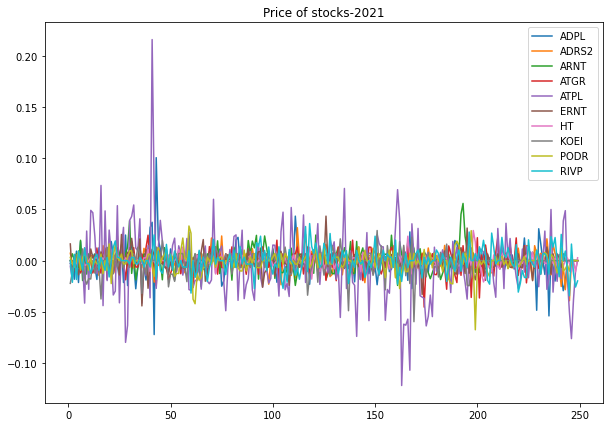

In [17]:
for i, col in enumerate(df.columns):
    returns[col].plot(figsize=(10,7))
plt.title('Price of stocks-2021')
plt.xlabel(xlabel=None)
plt.legend(df.columns)

plt.savefig('returns21.png', bbox_inches='tight')
#mora bit bolji nacin za plotat ovo da je preglednije (ili da plotam za svaku dionicu posebnp, kao skup grafova??)

In [9]:
numstocks=10
weights=np.repeat(0.1,numstocks)
weighted_returns = (weights * returns)
print(weighted_returns.head())

       ADPL     ADRS2      ARNT      ATGR      ATPL      ERNT        HT  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1 -0.000302  0.000723  0.000000  0.000000 -0.000538  0.001630 -0.000270   
2  0.000000 -0.000239  0.000667 -0.000595 -0.001892 -0.001604 -0.000270   
3 -0.001818 -0.000480  0.000000  0.000000  0.000000 -0.000815 -0.000271   
4  0.000926  0.000000  0.000662 -0.000599 -0.000551 -0.000548 -0.000272   

       KOEI      PODR      RIVP  
0       NaN       NaN       NaN  
1 -0.002222  0.000316  0.000000  
2 -0.001136 -0.000315 -0.002121  
3  0.000000 -0.000633  0.000619  
4  0.000575  0.000000 -0.001846  


0      0.000000
1     -0.000662
2     -0.007507
3     -0.003398
4     -0.001653
         ...   
245   -0.013669
246   -0.007093
247   -0.005083
248   -0.004670
249   -0.001709
Length: 250, dtype: float64


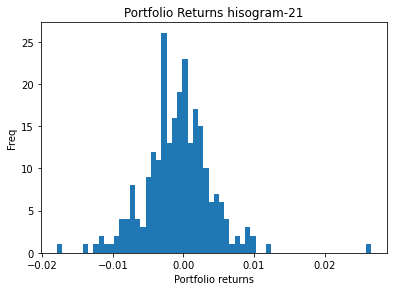

<Figure size 432x288 with 0 Axes>

In [20]:
portfolio_return = weighted_returns.sum(axis=1)
print(portfolio_return)
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(portfolio_return, bins = 60)
ax1.set_xlabel('Portfolio returns')
ax1.set_ylabel("Freq")
ax1.set_title("Portfolio Returns hisogram-21")
plt.show(); 
plt.savefig('Portfolio returns hisogram-21.png', bbox_inches='tight')

In [12]:
volatility = returns.std()#sta cu s tobom???
volatility


ADPL     0.014090
ADRS2    0.009136
ARNT     0.010765
ATGR     0.010374
ATPL     0.032772
ERNT     0.009157
HT       0.005725
KOEI     0.010638
PODR     0.009892
RIVP     0.011918
dtype: float64

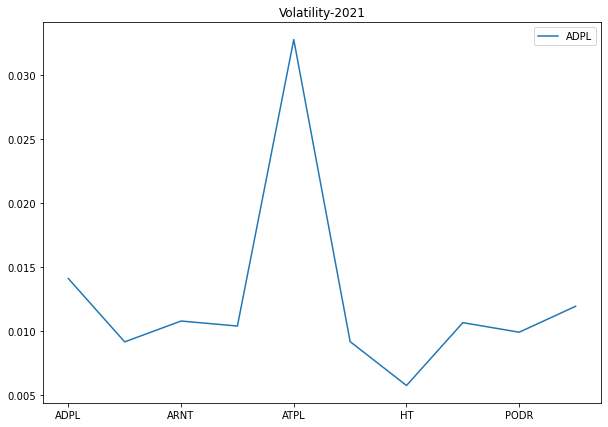

In [23]:
volatility.plot(figsize=(10,7))
plt.title('Volatility-2021')

plt.xlabel(xlabel=None)
plt.legend(df.columns)
#problem
plt.savefig('volatility21-fail.png', bbox_inches='tight')